In [1]:
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

import pandas as pd

In [2]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0] + phi1*x[1] + phi11*x[2]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+phi1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1+phi11)*x[2]
    return sdot,i1dot,d11dot

In [3]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5
phi1 = 0.4
phi11 = 0.2

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))

phim = 0.45
phi1m = 0.25

In [4]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [5]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[1999]
I1=I1s[1999]
D11=D11s[1999]

In [6]:
def fitnessgrad():
    lambda1=(betam*(I1+D11))
    alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
    alphamd = 0.157*np.exp(0.2*(betam - 0.75)/0.157)
    dr = sigmaS*S*(((mu+alpham+phim+(sigmaI*lambda1)-(betam*alphamd))/((mu+alpham+phim+(sigmaI*lambda1))**2))+(((sigmaI*lambda1)/(mu+alpham+phim+(sigmaI*lambda1)))*(((mu+alpham+phi1m-(betam*alphamd))/((mu+alpham+phi1m)**2))-((((betam*alphamd)/(mu+alpham+phi1m)))/(mu+alpham+phim+(sigmaI*lambda1)))))) + sigmaI*I1*((1/(mu+alpham+phi1m))-((betam*alphamd)/((mu+alpham+phi1m)**2)))
    return dr 

# $\sigma_S$ and $\mu$

In [7]:
muvals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaSvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=1, stop=2.0001, step=0.0001),decimals=4)

In [8]:
N=10
singstratsmu=np.zeros((N,N))
#singstrat

In [9]:
N=10
for m in range(0,N):
    mu = muvals[m]
    for i in range(0,N):
        sigmaS = sigmaSvals[i] 
        for j in betamvals:
            betam = j 

            x0 = [0.8,0.5,0.05]
            xs = odeint(resident,x0,ts2)
            Ss = xs[:,0]
            I1s = xs[:,1]
            D11s = xs[:,2]

            S=Ss[1999]
            I1=I1s[1999]
            D11=D11s[1999]
            
            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstratsmu[m][i]=sings
                print("mu=", mu, "sigmaS=", sigmaS, "sings=",sings)
                break 

mu= 0.005 sigmaS= 1 sings= 1.4317
mu= 0.005 sigmaS= 2 sings= 1.4302000000000001
mu= 0.005 sigmaS= 3 sings= 1.4298
mu= 0.005 sigmaS= 4 sings= 1.4296
mu= 0.005 sigmaS= 5 sings= 1.4294
mu= 0.005 sigmaS= 6 sings= 1.4293
mu= 0.005 sigmaS= 7 sings= 1.4293
mu= 0.005 sigmaS= 8 sings= 1.4292
mu= 0.005 sigmaS= 9 sings= 1.4292
mu= 0.005 sigmaS= 10 sings= 1.4292
mu= 0.01 sigmaS= 1 sings= 1.4449
mu= 0.01 sigmaS= 2 sings= 1.4404000000000001
mu= 0.01 sigmaS= 3 sings= 1.4393
mu= 0.01 sigmaS= 4 sings= 1.4388
mu= 0.01 sigmaS= 5 sings= 1.4385000000000001
mu= 0.01 sigmaS= 6 sings= 1.4383000000000001
mu= 0.01 sigmaS= 7 sings= 1.4382000000000001
mu= 0.01 sigmaS= 8 sings= 1.4381000000000002
mu= 0.01 sigmaS= 9 sings= 1.438
mu= 0.01 sigmaS= 10 sings= 1.4379
mu= 0.015 sigmaS= 1 sings= 1.4617
mu= 0.015 sigmaS= 2 sings= 1.4511
mu= 0.015 sigmaS= 3 sings= 1.449
mu= 0.015 sigmaS= 4 sings= 1.4481000000000002
mu= 0.015 sigmaS= 5 sings= 1.4476
mu= 0.015 sigmaS= 6 sings= 1.4472
mu= 0.015 sigmaS= 7 sings= 1.447
mu= 0.015

In [10]:
df = pd.DataFrame(singstratsmu,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

,1,2,3,4,5,6,7,8,9,10
0.005,1.4317,1.4302,1.4298,1.4296,1.4294,1.4293,1.4293,1.4292,1.4292,1.4292
0.010,1.4449,1.4404,1.4393,1.4388,1.4385,1.4383,1.4382,1.4381,1.4380,1.4379
0.015,1.4617,1.4511,1.4490,1.4481,1.4476,1.4472,1.4470,1.4468,1.4467,1.4466
0.020,1.4789,1.4626,1.4590,1.4575,1.4567,1.4562,1.4559,1.4556,1.4554,1.4553
0.025,1.5171,1.4752,1.4693,1.4671,1.4659,1.4652,1.4647,1.4644,1.4641,1.4639
0.030,1.6771,1.4894,1.4801,1.4769,1.4752,1.4742,1.4736,1.4731,1.4727,1.4725
0.035,1.6816,1.5062,1.4915,1.4869,1.4847,1.4833,1.4825,1.4818,1.4814,1.4810
0.040,1.6862,1.5275,1.5037,1.4972,1.4942,1.4925,1.4914,1.4906,1.4900,1.4896
0.045,1.6906,1.5567,1.5169,1.5080,1.5040,1.5018,1.5004,1.4994,1.4986,1.4981
0.050,1.6951,1.6068,1.5317,1.5192,1.5140,1.5112,1.5094,1.5082,1.5073,1.5066


Text(33.0, 0.5, 'Mortality Rate, $\\mu$')

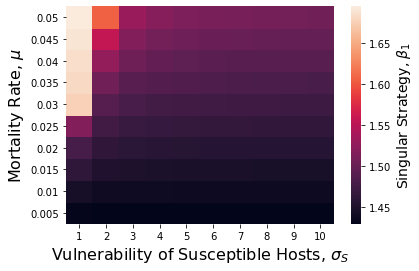

In [11]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=16)
ax.set_ylabel(r'Mortality Rate, $\mu$',fontsize=16)    

# $\sigma_S$ & $\rho$

In [7]:
mu = 0.02
rhovals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaSvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=1, stop=2.0001, step=0.0001),decimals=4)

In [8]:
N=10
singstratsrho=np.zeros((N,N))
#singstrat

In [9]:
N=10
for m in range(0,N):
    rho = rhovals[m]
    for i in range(0,N):
        sigmaS = sigmaSvals[i] 
        for j in betamvals:
            betam = j 

            x0 = [0.8,0.5,0.05]
            xs = odeint(resident,x0,ts2)
            Ss = xs[:,0]
            I1s = xs[:,1]
            D11s = xs[:,2]

            S=Ss[1999]
            I1=I1s[1999]
            D11=D11s[1999]
            
            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstratsrho[m][i]=sings
                print("rho=", rho, "sigmaS=", sigmaS, "sings=",sings)
                break 

rho= 0.005 sigmaS= 1 sings= 1.6679000000000002
rho= 0.005 sigmaS= 2 sings= 1.6679000000000002
rho= 0.005 sigmaS= 3 sings= 1.6633
rho= 0.005 sigmaS= 4 sings= 1.5879
rho= 0.005 sigmaS= 5 sings= 1.5642
rho= 0.005 sigmaS= 6 sings= 1.5531000000000001
rho= 0.005 sigmaS= 7 sings= 1.5461
rho= 0.005 sigmaS= 8 sings= 1.5413000000000001
rho= 0.005 sigmaS= 9 sings= 1.5378
rho= 0.005 sigmaS= 10 sings= 1.5352000000000001
rho= 0.01 sigmaS= 1 sings= 1.6679000000000002
rho= 0.01 sigmaS= 2 sings= 1.5349000000000002
rho= 0.01 sigmaS= 3 sings= 1.5045
rho= 0.01 sigmaS= 4 sings= 1.4951
rho= 0.01 sigmaS= 5 sings= 1.4906000000000001
rho= 0.01 sigmaS= 6 sings= 1.4879
rho= 0.01 sigmaS= 7 sings= 1.4861
rho= 0.01 sigmaS= 8 sings= 1.4849
rho= 0.01 sigmaS= 9 sings= 1.4839
rho= 0.01 sigmaS= 10 sings= 1.4832
rho= 0.015 sigmaS= 1 sings= 1.6571
rho= 0.015 sigmaS= 2 sings= 1.4806000000000001
rho= 0.015 sigmaS= 3 sings= 1.4721
rho= 0.015 sigmaS= 4 sings= 1.4689
rho= 0.015 sigmaS= 5 sings= 1.4672
rho= 0.015 sigmaS= 6 sing

In [10]:
df = pd.DataFrame(singstratsrho,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

NameError: name 'muvals' is not defined

In [ ]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=16)
ax.set_ylabel(r'Host Birth Rate, $\rho$',fontsize=16)    

# $\sigma_I$ & $\mu$

In [ ]:
sigmaS = 1
rho = 0.02
muvals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaIvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=1, stop=2.0001, step=0.0001),decimals=4)

In [ ]:
N=10
singstratimu=np.zeros((N,N))
#singstrat

In [ ]:
N=10
for m in range(0,N):
    mu = muvals[m]
    for i in range(0,N):
        sigmaI = sigmaIvals[i] 
        for j in betamvals:
            betam = j 

            x0 = [0.8,0.5,0.05]
            xs = odeint(resident,x0,ts2)
            Ss = xs[:,0]
            I1s = xs[:,1]
            D11s = xs[:,2]

            S=Ss[1999]
            I1=I1s[1999]
            D11=D11s[1999]
            
            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstratimu[m][i]=sings
                print("mu=", mu, "sigmaI=", sigmaI, "sings=",sings)
                break 

In [ ]:
df = pd.DataFrame(singstratimu,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

In [ ]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=16)
ax.set_ylabel(r'Mortality Rate, $\mu$',fontsize=16)    

# $\sigma_I$ & $\rho$

In [ ]:
mu = 0.02
rhovals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaIvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=1, stop=2.0001, step=0.0001),decimals=4)

In [ ]:
N=10
singstratirho=np.zeros((N,N))
#singstrat

In [ ]:
N=10
for m in range(0,N):
    rho = rhovals[m]
    for i in range(0,N):
        sigmaI = sigmaIvals[i] 
        for j in betamvals:
            betam = j 

            x0 = [0.8,0.5,0.05]
            xs = odeint(resident,x0,ts2)
            Ss = xs[:,0]
            I1s = xs[:,1]
            D11s = xs[:,2]

            S=Ss[1999]
            I1=I1s[1999]
            D11=D11s[1999]
            
            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstratirho[m][i]=sings
                print("rho=", rho, "sigmaI=", sigmaI, "sings=",sings)
                break 

In [ ]:
df = pd.DataFrame(singstratirho,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

In [ ]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=16)
ax.set_ylabel(r'Host Birth Rate, $\rho$',fontsize=16)    